In [4]:
pip install shap

   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/531.1 kB ? eta -:--:--
   -------------------------------------  524.3/531.1 kB 837.5 kB/s eta 0:00:01
   -------------------------------------- 531.1/531.1 kB 747.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap

In [8]:
# Load the dataset
df = pd.read_csv("diabetes.csv")  # Ensure the correct path

In [10]:
# Display basic info
print("Dataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Dataset Info:
 None

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29       

In [12]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


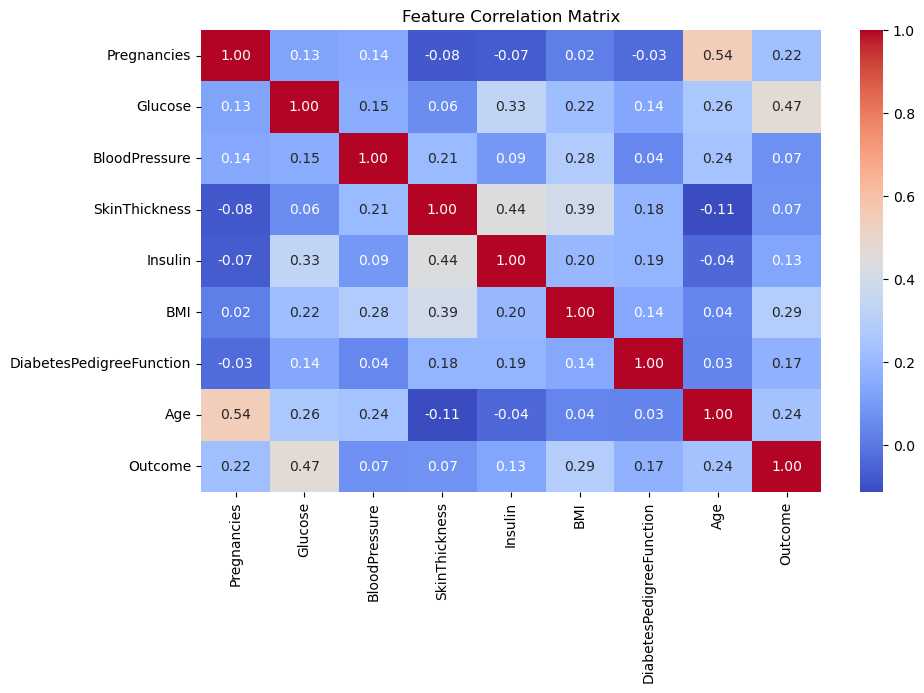

In [14]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

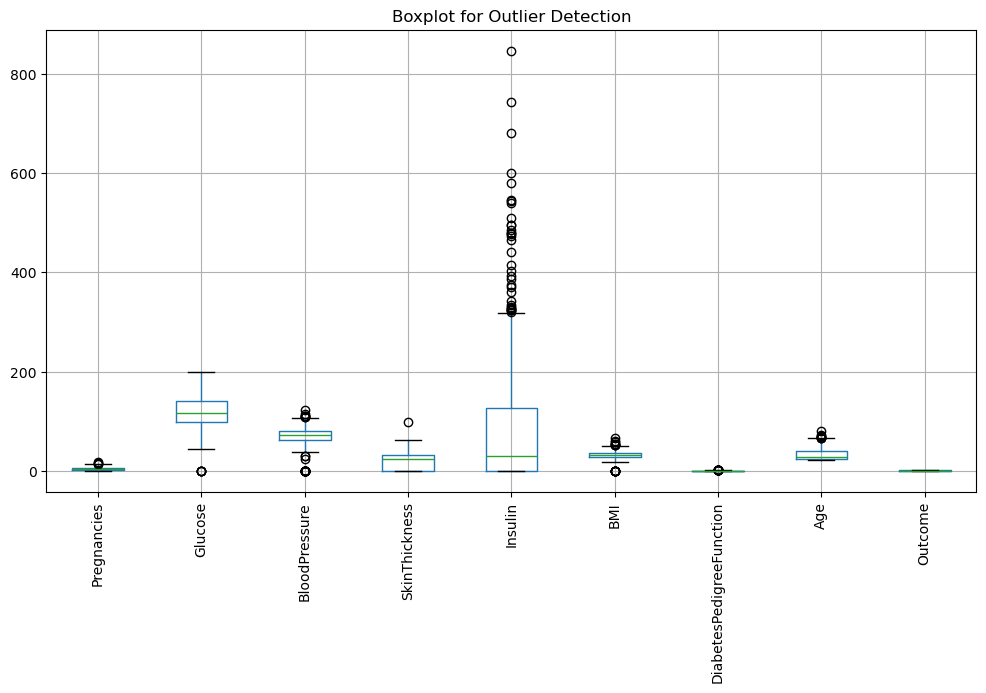

In [16]:
# Boxplot to check outliers
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [18]:
# Define features and target variable
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

In [20]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Train RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
# Model Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154


Confusion Matrix:
 [[85 15]
 [22 32]]


<Figure size 640x480 with 0 Axes>

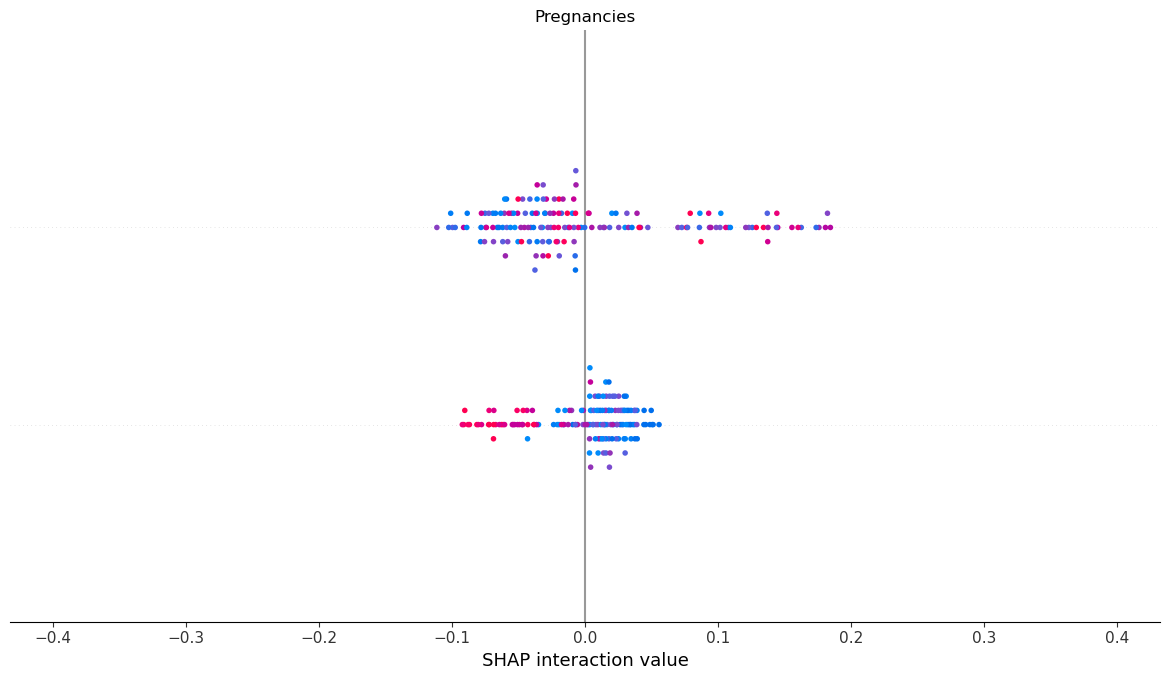

In [32]:
# Feature Importance using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)  # Fix the error

# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])

<Figure size 640x480 with 0 Axes>

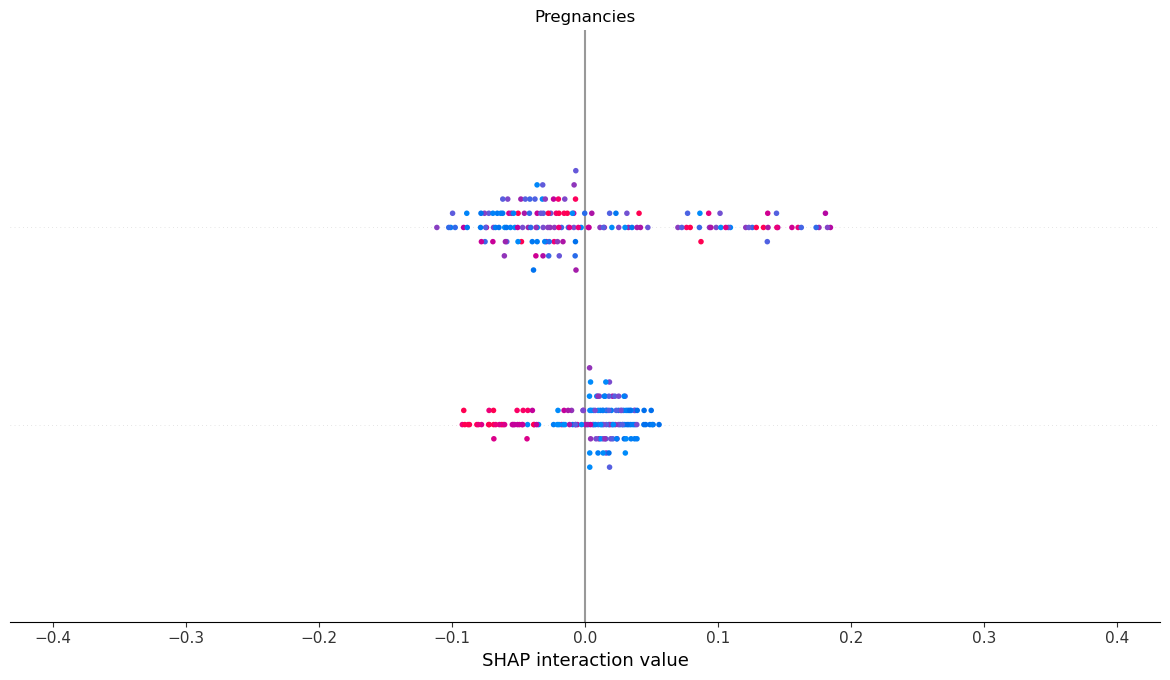

In [34]:
# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])